In [0]:
# !pip install fastai==0.7.0
# import sys
# !{sys.executable} -m pip install torchtext==0.2.3
# !pip install torch==0.4

In [0]:
# !curl 'https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar' -o 'VOCtrainval_06-Nov-2007.tar' -H 'Connection: keep-alive' -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'Upgrade-Insecure-Requests: 1' -H 'DNT: 1' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3735.0 Safari/537.36' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3' -H 'Accept-Encoding: gzip, deflate, br' -H 'Accept-Language: en-GB,en;q=0.9,en-US;q=0.8,bn;q=0.7' -H 'Cookie: __utmc=134107727; __utmz=134107727.1553054465.2.2.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not%20provided); __utma=134107727.205412972.1553047529.1553054465.1553930584.3; __utmt=1; __utmb=134107727.1.10.1553930584' --compressed

# !curl 'https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar' -o 'VOCtest_06-Nov-2007.tar' -H 'Connection: keep-alive' -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'Upgrade-Insecure-Requests: 1' -H 'DNT: 1' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3735.0 Safari/537.36' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3' -H 'Accept-Encoding: gzip, deflate, br' -H 'Accept-Language: en-GB,en;q=0.9,en-US;q=0.8,bn;q=0.7' -H 'Cookie: __utmc=134107727; __utmz=134107727.1553054465.2.2.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not%20provided); __utma=134107727.205412972.1553047529.1553054465.1553930584.3; __utmt=1; __utmb=134107727.1.10.1553930584' --compressed

# !curl https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip -o PASCAL_VOC.zip

In [0]:
# !tar -xvf VOCtrainval_06-Nov-2007.tar

# !tar -xvf 'VOCtest_06-Nov-2007.tar'

# !unzip PASCAL_VOC.zip

In [0]:
# !mv VOCdevkit PASCAL_VOC

In [5]:
!ls PASCAL_VOC

pascal_test2007.json   pascal_train2012.json  pascal_val2012.json
pascal_train2007.json  pascal_val2007.json    VOCdevkit


## Code Start

In [0]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
from json import *
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

In [9]:
PATH = Path('PASCAL_VOC/')
list(PATH.iterdir())

[PosixPath('PASCAL_VOC/pascal_train2012.json'),
 PosixPath('PASCAL_VOC/pascal_val2012.json'),
 PosixPath('PASCAL_VOC/pascal_test2007.json'),
 PosixPath('PASCAL_VOC/VOCdevkit'),
 PosixPath('PASCAL_VOC/pascal_train2007.json'),
 PosixPath('PASCAL_VOC/pascal_val2007.json')]

In [10]:
trn_js = json.load((PATH/'pascal_train2007.json').open())
trn_js.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [11]:
IMAGES, ANNOTATIONS, CATEGORIES = 'images', 'annotations', 'categories'

trn_js[IMAGES][:2]

[{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500},
 {'file_name': '000017.jpg', 'height': 364, 'id': 17, 'width': 480}]

In [12]:
trn_js[ANNOTATIONS][:2]

[{'area': 34104,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0,
  'image_id': 12,
  'iscrowd': 0,
  'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]},
 {'area': 13110,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0,
  'image_id': 17,
  'iscrowd': 0,
  'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]]}]

In [13]:
trn_js[CATEGORIES][:2]

[{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'none'}]

In [0]:
FILE_NAME, ID, CAT_ID, IMG_ID, BBOX, NAME = 'file_name', 'id', 'category_id', 'image_id', 'bbox', 'name'

cats = {o[ID]: o[NAME] for o in trn_js[CATEGORIES]}
trn_fns = {o[ID]: o[FILE_NAME] for o in trn_js[IMAGES]}
trn_ids = [o[ID] for o in trn_js[IMAGES]]

In [15]:
list((PATH/'VOCdevkit'/'VOC2007').iterdir())

[PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/JPEGImages'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/ImageSets'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/Annotations'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/SegmentationObject'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/SegmentationClass')]

In [0]:
JPEGS = 'VOCdevkit/VOC2007/JPEGImages'
IMG_PATH = PATH/JPEGS

In [17]:
list((IMG_PATH).iterdir())[:4]

[PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/JPEGImages/002272.jpg'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/JPEGImages/005773.jpg'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/JPEGImages/001483.jpg'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/JPEGImages/009104.jpg')]

In [18]:
im0_d = trn_js[IMAGES][0]
im0_d[FILE_NAME], im0_d[ID]

('000012.jpg', 12)

In [0]:
hw_bb = lambda bb: np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])
bb_hw = lambda a: np.array([a[1], a[0], a[3]-a[1]+1, a[2]-a[0]+1])

In [0]:
trn_anno = collections.defaultdict(lambda: [])
for o in trn_js[ANNOTATIONS]:
  if not o['ignore']:
    bb = o[BBOX]
    bb = hw_bb(bb)
    trn_anno[o[IMG_ID]].append((bb, o[CAT_ID]))

In [22]:
len(trn_anno)

2501

In [24]:
im_a = trn_anno[im0_d[ID]]; im_a

[(array([ 96, 155, 269, 350]), 7)]

In [25]:
im0_a = im_a[0]; im0_a

(array([ 96, 155, 269, 350]), 7)

In [26]:
cats[7]

'car'

In [27]:
trn_anno[17]

[(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]

In [28]:
cats[15], cats[13]

('person', 'horse')

In [0]:
bb_voc = [155, 96, 196, 174]
bb_fastai = hw_bb(bb_voc)

In [30]:
f'expected: {bb_voc}, fastai: {bb_fastai}, actual: {bb_hw(bb_fastai)}'

'expected: [155, 96, 196, 174], fastai: [ 96 155 269 350], actual: [155  96 196 174]'

In [0]:
im = open_image(IMG_PATH/im0_d[FILE_NAME])

In [0]:
def show_image(im, figsize=None, ax=None):
  if not ax:
    fig, ax = plt.subplots(figsize=figsize)
  ax.imshow(im)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  return ax

In [0]:
def draw_outline(o, lw):
  o.set_path_effects([patheffects.Stroke(
  linewidth=lw, foreground='black'), patheffects.Normal()
  ])

In [0]:
def draw_rect(ax, b):
  patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
  draw_outline(patch, 4)

In [0]:
def draw_text(ax, xy, txt, sz=14):
  text = ax.text(*xy, txt, verticalalignment='top', color='white', fontsize=sz, weight='bold')
  draw_outline(text, 1)

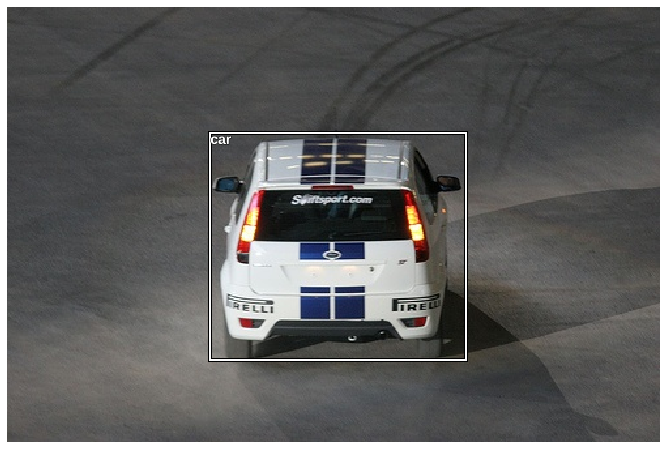

In [36]:
ax = show_image(im, figsize=(16, 8))
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

In [0]:
def draw_image(im, ann):
  ax = show_image(im, figsize=(16, 8))
#   import pdb; pdb.set_trace()
  for b, c in ann:
    b = bb_hw(b)
    draw_rect(ax, b)
    draw_text(ax, b[:2], cats[c], sz=16)

In [0]:
def draw_idx(trn_anno, idx):
  im_a = trn_anno[idx]
  im = open_image(IMG_PATH/trn_fns[idx])
  print(im.shape)
  draw_image(im, im_a)

(364, 480, 3)


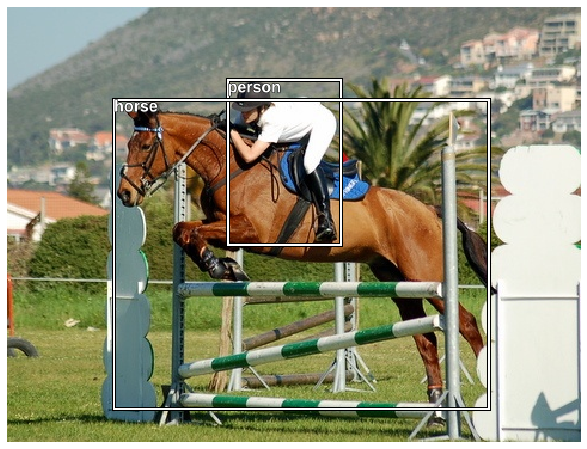

In [39]:
draw_idx(trn_anno, 17)

(371, 500, 3)


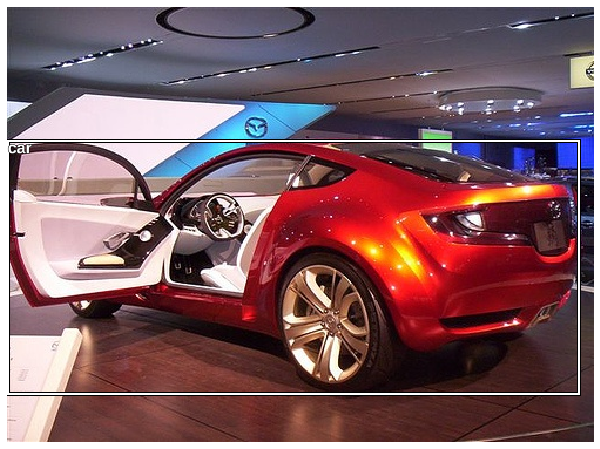

In [40]:
draw_idx(trn_anno, trn_ids[27])

In [0]:
def get_lrg(b):
  if not b:
    raise Exception()
  b = sorted(b, key=lambda x: np.product(x[0][-2:] - x[0][:2]), reverse=True)
  return np.array([b[0]])

In [0]:
trn_lrg_anno = {k: get_lrg(v) for k, v in trn_anno.items()}

(500, 334, 3)


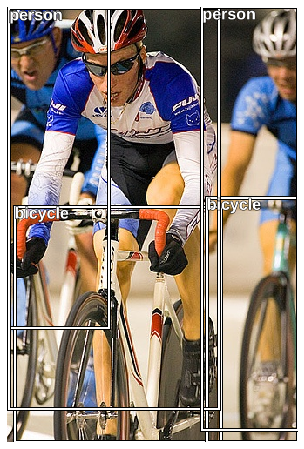

In [43]:
draw_idx(trn_anno, 23)

(500, 334, 3)


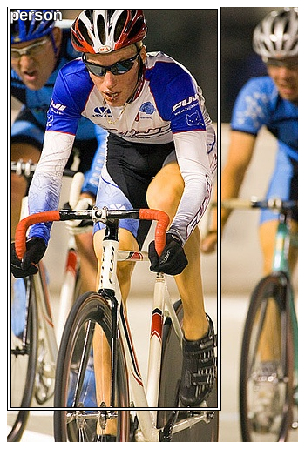

In [44]:
draw_idx(trn_lrg_anno, 23)

In [0]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [0]:
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
                   'cats': [cats[trn_lrg_anno[o][0][1]] for o in trn_ids]},
                   columns=['fn', 'cats'])
df.to_csv(CSV, index=False)

In [47]:
df.head()

fn       cats
0  000012.jpg        car
1  000017.jpg      horse
2  000023.jpg     person
3  000026.jpg        car
4  000032.jpg  aeroplane

## Create the Model

In [0]:
f_model = resnet34
sz=224
bs=64

In [0]:
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, crop_type=CropType.NO)
md = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms, bs=bs)

In [0]:
x, y = next(iter(md.val_dl))

In [51]:
x.shape, y.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

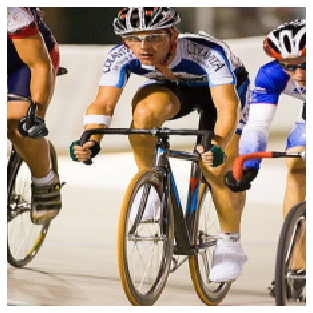

In [52]:
show_image(md.val_ds.denorm(to_np(x))[0]);

In [53]:
learn = ConvLearner.pretrained(f_model, md, metrics=[accuracy])
learn.opt_fn = optim.Adam

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:07<00:00, 11706034.59it/s]
/usr/local/lib/python3.6/dist-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [54]:
learn.lr_find()

 91%|█████████ | 29/32 [00:21<00:01,  2.41it/s, loss=10.4]

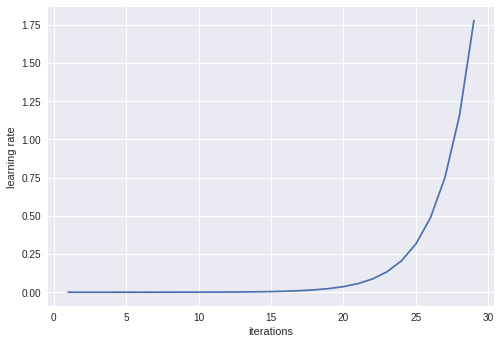

In [55]:

learn.sched.plot_lr()

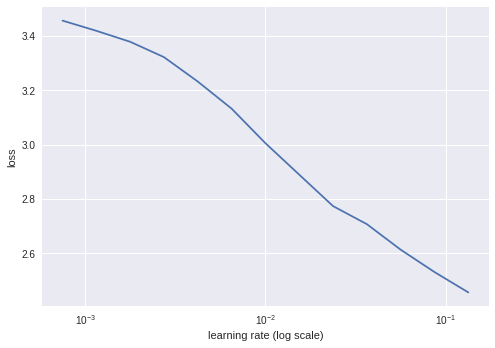

In [56]:
learn.sched.plot()

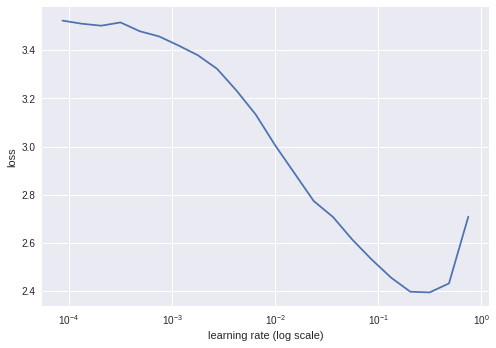

In [57]:
learn.sched.plot(n_skip=5, n_skip_end=1)

In [0]:
lr = 2e-2

In [59]:
learn.fit(lr, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      1.288555   0.683394   0.806     


[0.6833935146331787, 0.8059999980926513]

In [0]:
lrs = np.array([lr/1000, lr/100, lr])

In [0]:
learn.freeze_to(-2)

In [62]:
learn.fit(lrs/5, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.852558   0.626216   0.816     


[0.6262160234451294, 0.8160000009536743]

In [0]:
learn.unfreeze()

In [64]:
learn.fit(lrs/5, 1, cycle_len=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.64561    0.585315   0.814     
    1      0.464286   0.572771   0.836     


[0.5727707438468933, 0.8359999990463257]

## Look At the Result

In [0]:
x, y = next(iter(md.val_dl))
probs = F.softmax(predict_batch(learn.model, x), -1)
x, preds = to_np(x), to_np(probs)
preds = np.argmax(preds, -1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


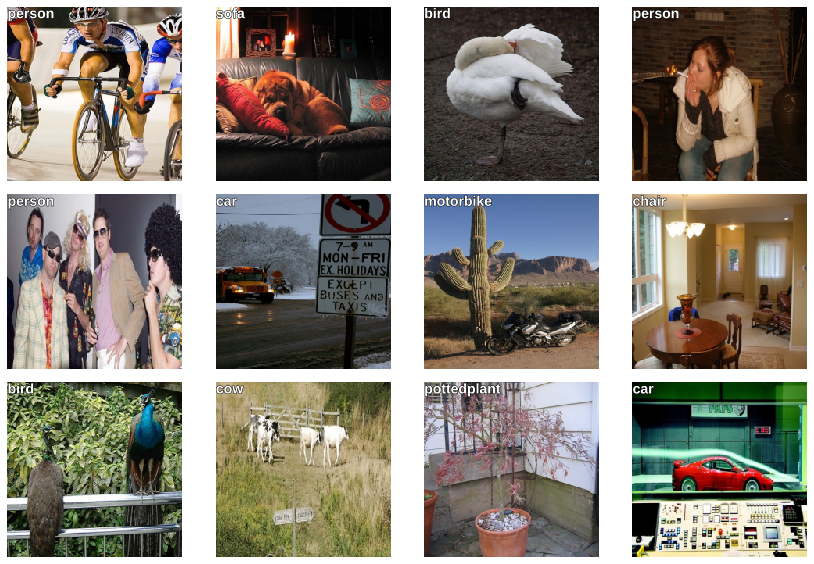

In [66]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
  ima=md.val_ds.denorm(x)[i]
  b = md.classes[preds[i]]
  ax = show_image(ima, ax=ax)
  draw_text(ax, (0, 0), b)
plt.tight_layout()

In [0]:
BB_CSV = PATH/'tmp'/'bb.csv'

In [101]:
str(list(trn_lrg_anno[17][0][0]))[1:-1]

'77, 89, 335, 402'

In [0]:
bb = np.array([trn_lrg_anno[o] for o in trn_ids])
bbs = [' '.join(str(p) for p in o.ravel()[0]) for o in bb]

df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
                   'bbox': bbs}, columns=['fn', 'bbox'])
df.to_csv(BB_CSV, index=False)

In [120]:
df.head()

fn            bbox
0  000012.jpg  96 155 269 350
1  000017.jpg   77 89 335 402
2  000023.jpg     1 2 461 242
3  000026.jpg  124 89 211 336
4  000032.jpg  77 103 182 374

In [0]:
f_model = resnet34
sz=224
bs=64

In [0]:
augs = [RandomFlip(), RandomRotate(30), RandomLighting(0.1, 0.1)]

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms,
                                  continuous=True, bs=4)

[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]


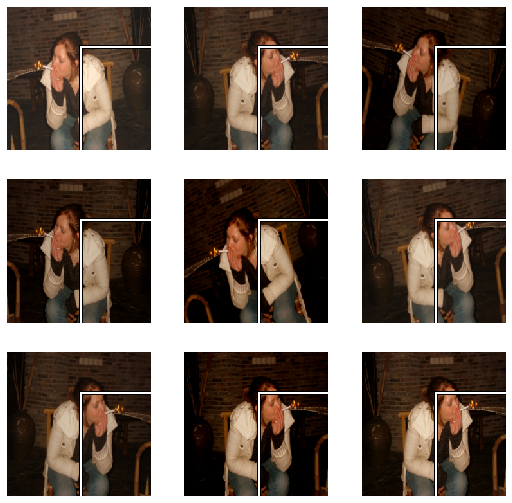

In [125]:
idx=3
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
  x, y = next(iter(md.aug_dl))
  ima=md.val_ds.denorm(to_np(x))[idx]
  b = bb_hw(to_np(y[idx]))
  print(b)
  show_image(ima, ax=ax)
  draw_rect(ax, b)

In [0]:
aug = [RandomFlip(tfm_y=TfmType.COORD),
       RandomRotate(30, tfm_y=TfmType.COORD),
       RandomLighting(0.1, 0.1, tfm_y=TfmType.COORD)]

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)

[ 52.  38. 107. 185.]
[ 52.  38. 107. 185.]
[ 52.  38. 107. 185.]
[ 52.  38. 107. 185.]
[ 52.  38. 107. 185.]
[ 52.  38. 107. 185.]
[ 52.  38. 107. 185.]
[ 52.  38. 107. 185.]
[ 52.  38. 107. 185.]


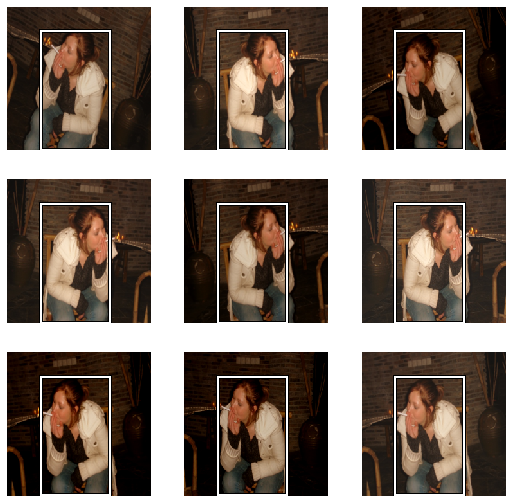

In [130]:
idx=3
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
  x, y = next(iter(md.aug_dl))
  ima=md.val_ds.denorm(to_np(x))[idx]
  b = bb_hw(to_np(y[idx]))
  print(b)
  show_image(ima, ax=ax)
  draw_rect(ax, b)

In [0]:
tfm_y = TfmType.COORD
aug = [RandomFlip(tfm_y=tfm_y),
       RandomRotate(3, p=0.5, tfm_y=tfm_y),
       RandomLighting(0.05, 0.05, tfm_y=tfm_y)]

tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=tfm_y, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=bs)

In [155]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', True),
                           ('nb_params', tensor(9408))])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', True),
                           ('nb_params', tensor(128))])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape',

In [0]:
head_reg4 = nn.Sequential(Flatten(), nn.Linear(25088, 4))
learn = ConvLearner.pretrained(f_model, md, custom_head=head_reg4)
learn.opt_fn = optim.Adam
learn.crit = nn.L1Loss()

In [157]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', tensor(9408))])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', tensor(128))])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape

 78%|███████▊  | 25/32 [00:25<00:08,  1.26s/it, loss=484]

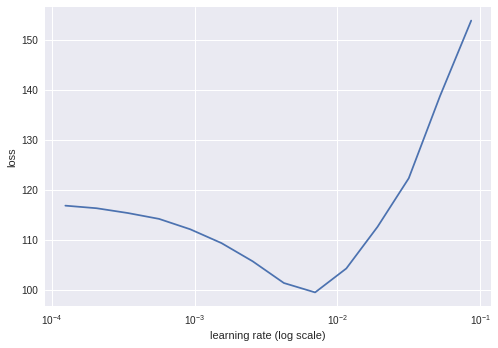

In [158]:
learn.lr_find(1e-5,100)
learn.sched.plot(5)

In [0]:
lr = 2e-3

In [160]:
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   
    0      50.49519   35.126865 
    1      38.496222  29.369399 
    2      32.905113  28.817424 


[28.817423629760743]

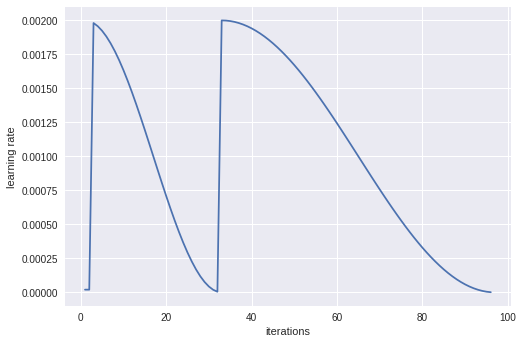

In [161]:
learn.sched.plot_lr()

In [0]:

lrs = np.array([lr/100,lr/10,lr])

In [0]:
learn.freeze_to(-2)

epoch      trn_loss   val_loss   
    0      66.187     9736703590315066.0


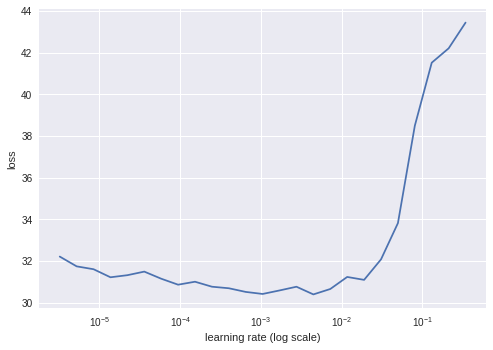

In [164]:

lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [165]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   
    0      28.122118  25.302953 
    1      25.808766  24.876977 
    2      23.154534  23.515542 


[23.51554153442383]

In [0]:
learn.freeze_to(-3)

In [167]:
learn.fit(lrs, 1, cycle_len=2)

epoch      trn_loss   val_loss   
    0      22.44986   25.452242 
    1      20.560751  23.746832 


[23.746832290649415]

In [0]:
learn.save('reg4')

In [0]:
learn.load('reg4')

In [0]:
x, y = next(iter(md.val_dl))
learn.model.eval()
preds = to_np(learn.model(VV(x)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


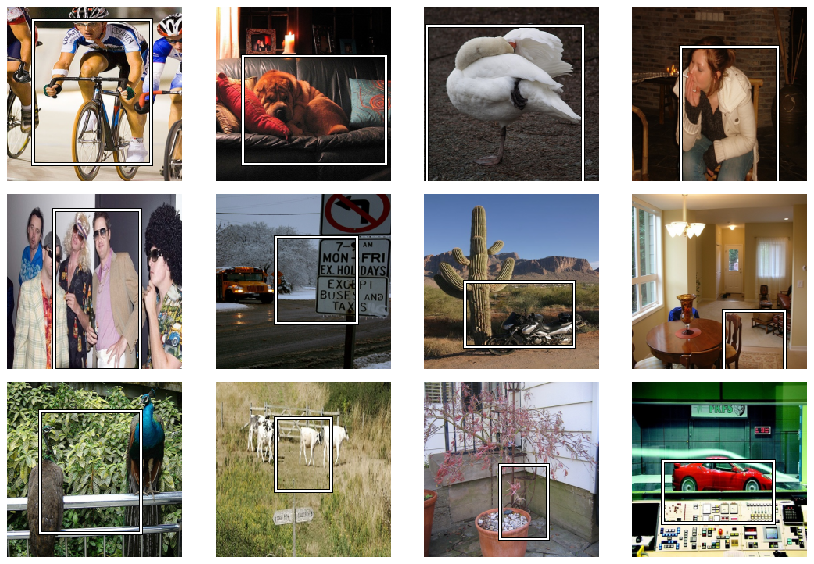

In [171]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
  ima = md.val_ds.denorm(to_np(x))[i]
  b = bb_hw(preds[i])
  ax = show_image(ima, ax=ax)
  draw_rect(ax, b)
plt.tight_layout()